In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sweetviz as sv

In [36]:
df = pd.read_csv('full.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
column_with_nan = df.columns[df.isnull().any()]

for column in column_with_nan:
    if df[column].isnull().sum()*100.0/df.shape[0] > 50:
        df.drop(column,1, inplace=True)

/var/folders/pb/gdgsqc111yn_xn266_983vdm0000gn/T/ipykernel_741/1200674382.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(column,1, inplace=True)


In [38]:
df['code_departement'] = pd.to_numeric(df['code_departement'], downcast="integer", errors='coerce')
df['code_postal'] = pd.to_numeric(df['code_postal'], downcast="integer", errors='coerce')

In [39]:
index_with_nan = df.index[df.isnull().any(axis=1)]
df.drop(index_with_nan,0, inplace=True)



/var/folders/pb/gdgsqc111yn_xn266_983vdm0000gn/T/ipykernel_741/531292811.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(index_with_nan,0, inplace=True)


In [40]:
df['code_departement'] = df['code_departement'].apply(np.int64)
df['code_postal'] = df['code_postal'].apply(np.int64)
df['valeur_fonciere'] = df['valeur_fonciere'].apply(np.int64)
df['nombre_pieces_principales'] = df['nombre_pieces_principales'].apply(np.int64)
df['date_mutation'] = df['date_mutation'].astype('datetime64[ns]')
#df['adresse_code_voie'] = df['adresse_code_voie'].astype('str')
df['code_commune'] = df['code_commune'].astype(str)
df.drop(columns = ['adresse_code_voie'])
df.drop(columns = ['code_commune'])
df.drop_duplicates(inplace=True)

In [41]:
#my_report = sv.analyze(df)
#my_report.show_html()


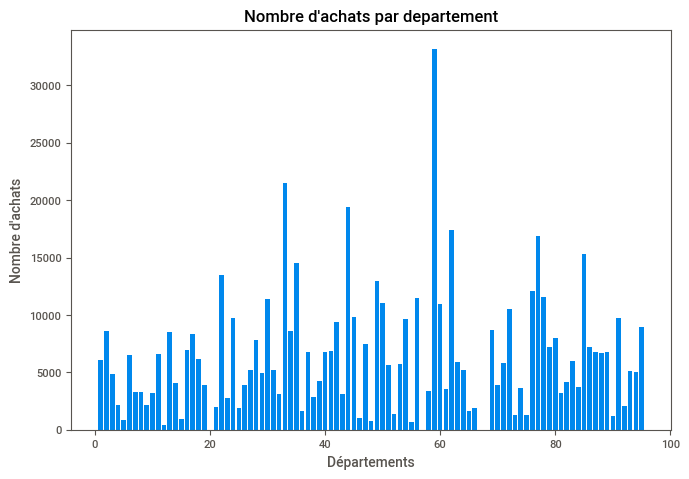

In [42]:
#print(df.columns)
#print(df['valeur_fonciere'])

test = df.groupby(df['code_departement'],as_index = False).size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['code_departement'].head(91),test['size'].head(91))
ax.set_ylabel("Nombre d'achats")
ax.set_xlabel('Départements')
ax.set_title("Nombre d'achats par departement")
plt.show()

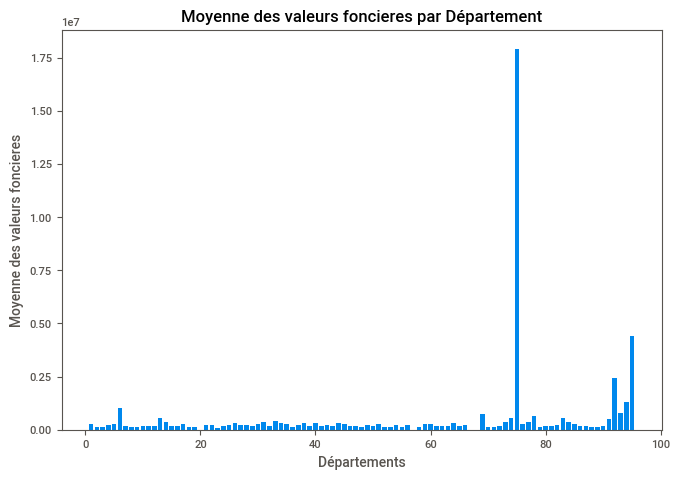

In [43]:
test = df.groupby(df['code_departement'],as_index = False)['valeur_fonciere'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['code_departement'].head(91),test['valeur_fonciere'].head(91),width=0.8)
ax.set_ylabel('Moyenne des valeurs foncieres')
ax.set_xlabel('Départements')
ax.set_title('Moyenne des valeurs foncieres par Département')
plt.show()

In [44]:
print(df['nombre_pieces_principales'][df['type_local'] == 'Dépendance'])

18         0
19         0
56         0
70         0
209        0
          ..
2458187    0
2458837    0
2459289    0
2459433    0
2459556    0
Name: nombre_pieces_principales, Length: 41250, dtype: int64


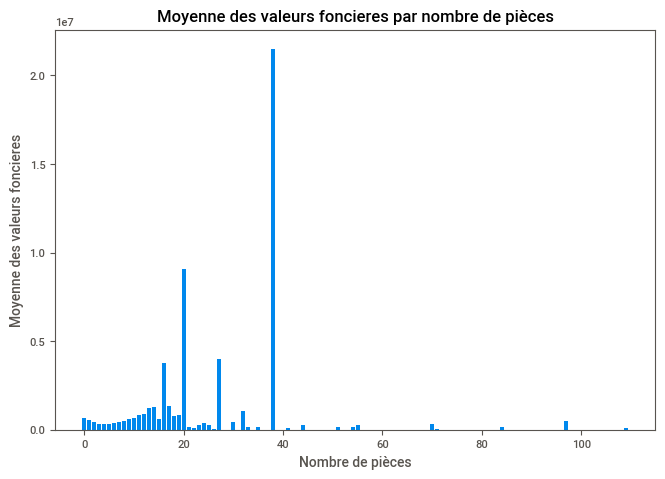

In [45]:
test = df.groupby(df['nombre_pieces_principales'],as_index = False)['valeur_fonciere'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['nombre_pieces_principales'],test['valeur_fonciere'],width=0.8)
ax.set_ylabel('Moyenne des valeurs foncieres')
ax.set_xlabel('Nombre de pièces')
ax.set_title('Moyenne des valeurs foncieres par nombre de pièces')
plt.show()

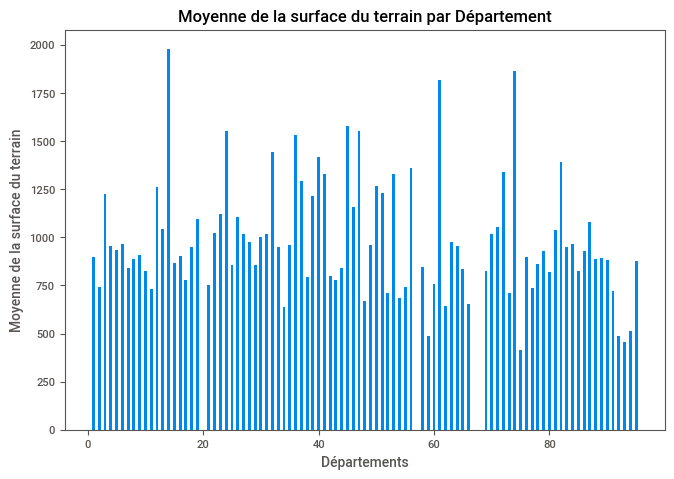

In [46]:
test = df.groupby(df['code_departement'],as_index = False)['surface_terrain'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['code_departement'].head(91),test['surface_terrain'].head(91),width=0.5)
ax.set_ylabel('Moyenne de la surface du terrain')
ax.set_xlabel('Départements')
ax.set_title('Moyenne de la surface du terrain par Département')
plt.show()

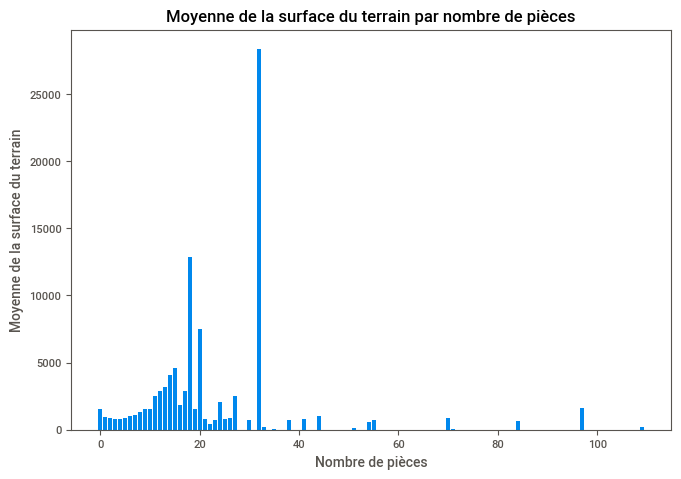

In [47]:
test = df.groupby(df['nombre_pieces_principales'],as_index = False)['surface_terrain'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['nombre_pieces_principales'],test['surface_terrain'],width=0.8)
ax.set_ylabel('Moyenne de la surface du terrain')
ax.set_xlabel('Nombre de pièces')
ax.set_title('Moyenne de la surface du terrain par nombre de pièces')
plt.show()

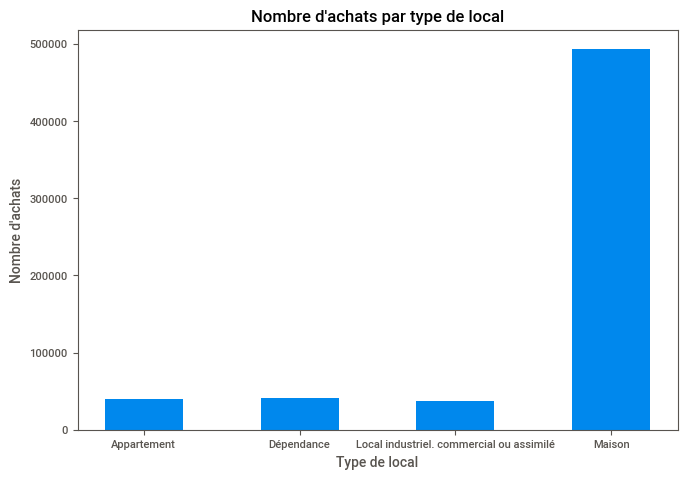

In [48]:
test = df.groupby(df['type_local'],as_index = False).size()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['type_local'],test['size'],width=0.5)
ax.set_ylabel("Nombre d'achats")
ax.set_xlabel('Type de local')
ax.set_title("Nombre d'achats par type de local")
plt.show()

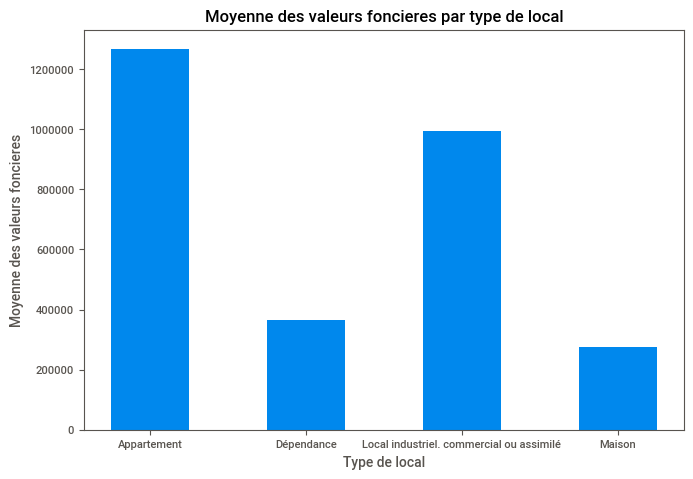

In [49]:
test = df.groupby(df['type_local'],as_index = False)['valeur_fonciere'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['type_local'],test['valeur_fonciere'],width=0.5)
ax.set_ylabel('Moyenne des valeurs foncieres')
ax.set_xlabel('Type de local')
ax.set_title('Moyenne des valeurs foncieres par type de local')
plt.show()

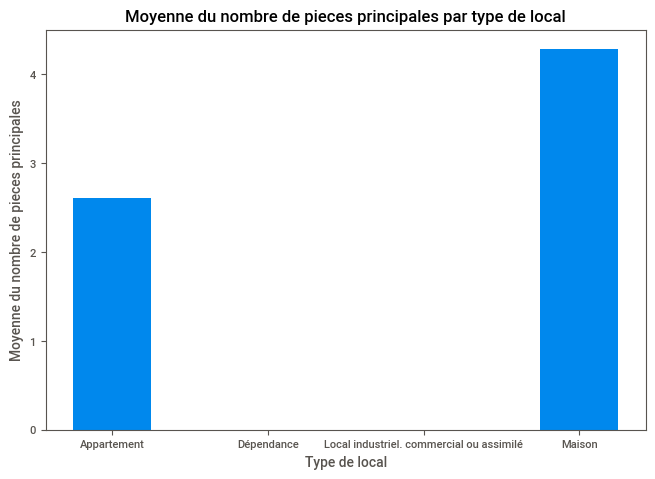

In [50]:
test = df.groupby(df['type_local'],as_index = False)['nombre_pieces_principales'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['type_local'],test['nombre_pieces_principales'],width=0.5)
ax.set_ylabel('Moyenne du nombre de pieces principales')
ax.set_xlabel('Type de local')
ax.set_title('Moyenne du nombre de pieces principales par type de local')
plt.show()

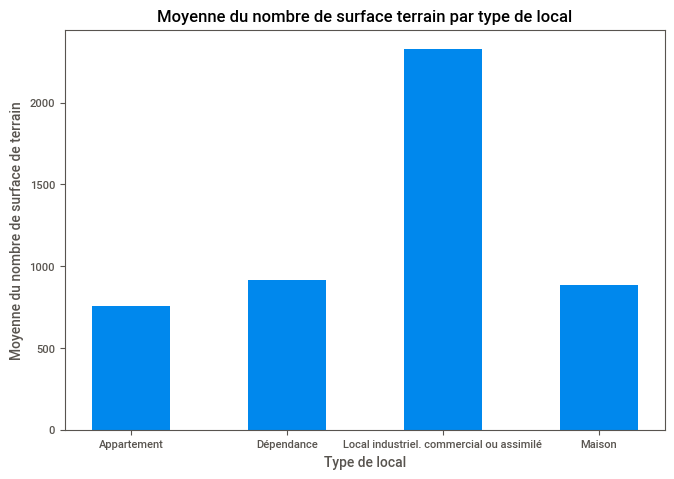

In [51]:
test = df.groupby(df['type_local'],as_index = False)['surface_terrain'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test['type_local'],test['surface_terrain'],width=0.5)
ax.set_ylabel('Moyenne de surface de terrain')
ax.set_xlabel('Type de local')
ax.set_title('Moyenne de surface terrain par type de local')
plt.show()

[56666, 54465, 38591, 24345, 57678, 57455, 53600, 43342, 62994, 62620, 46983, 52427]


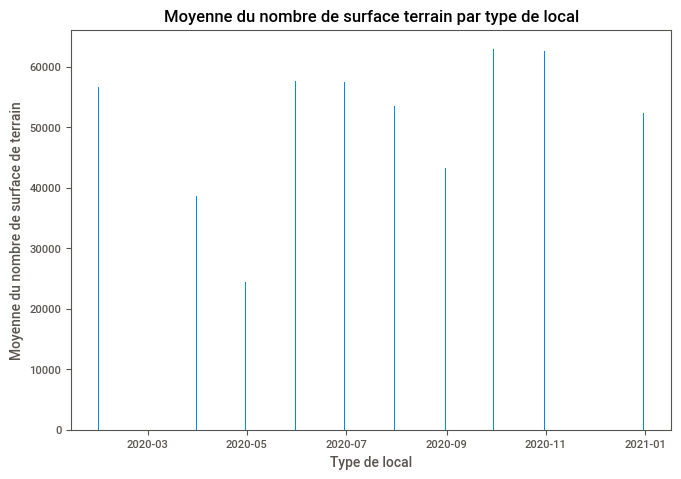

In [52]:
test = df.groupby(pd.Grouper(key='date_mutation',freq='M')).size()
y = []
for i in range(12):
    y.append(test[i])
print(y)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(test.index,y,width=0.5)
ax.set_ylabel('Moyenne du nombre de surface de terrain')
ax.set_xlabel('Type de local')
ax.set_title('Moyenne du nombre de surface terrain par type de local')
plt.show()

In [53]:
print(df.columns)

#print(df['adresse_code_voie'])


Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'id_parcelle', 'nombre_lots', 'code_type_local',
       'type_local', 'nombre_pieces_principales', 'code_nature_culture',
       'nature_culture', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')
